In [1]:
from easy21c import *
import numpy as np

#### Implement Sarsa(λ) in 21s. 
- [x] Initialise the value function to zero. 
- [x] Use the same step-size and exploration schedules as in the previous section. 
- [x] Run the algorithm with parameter values λ ∈ {0, 0.1, 0.2, ..., 1}. 
- [x] Stop each run after 1000 episodes 
    and report the mean-squared error over all states and actions, 
    comparing the true values Q∗(s,a) computed in the previous section with the estimated values Q(s, a) computed by Sarsa. 
- [x] Plot the mean- squared error against λ. 
- [x] For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number. 




In [2]:
class Sarsa_Agent:
    def __init__(self, environment, n0, mlambda):
        self.n0 = float(n0)
        self.env = environment
        self.mlambda = mlambda
        
        # N(s) is the number of times that state s has been visited
        # N(s,a) is the number of times that action a has been selected from state s.
        self.N = np.zeros((self.env.dealer_values_count,
                           self.env.player_values_count, 
                           self.env.actions_count))
        
        self.Q = np.zeros((self.env.dealer_values_count,
                           self.env.player_values_count, 
                           self.env.actions_count))
        self.E = np.zeros((self.env.dealer_values_count, self.env.player_values_count, self.env.actions_count))

        # Initialise the value function to zero. 
        self.V = np.zeros((self.env.dealer_values_count, self.env.player_values_count))
        
        self.count_wins = 0
        self.iterations = 0

        # get optimal action, with epsilon exploration (epsilon dependent on number of visits to the state)
    # ε-greedy exploration strategy with εt = N0/(N0 + N(st)), 
    def train_get_action(self, state):
        dealer_idx = state.dealer-1
        player_idx = state.player-1
        try:
            n_visits = sum(self.N[dealer_idx, player_idx, :])
        except:
            n_visits = 0        

        # epsilon = N0/(N0 + N(st)
        curr_epsilon = self.n0 / (self.n0 + n_visits)

        # epsilon greedy policy
        if random.random() < curr_epsilon:
            r_action = Actions.hit if random.random()<0.5 else Actions.stick
#             if (dealer_idx == 0 and player_idx == 0):
#                 print ("epsilon:%s, random:%s " % (curr_epsilon, r_action))
            return r_action
        else:
            action = Actions.to_action(np.argmax(self.Q[dealer_idx, player_idx, :]))
#             if (dealer_idx == 0 and player_idx == 0):
#                 print ("epsilon:%s Qvals:%s Q:%s" % (curr_epsilon, self.Q[dealer_idx, player_idx, :], action))
            return action

    def get_action(self, state):
        action = Actions.to_action(np.argmax(self.Q[state.dealer_idx(), state.player_idx(), :]))
        return action

    def validate(self, iterations):        
        wins = 0; 
        # Loop episodes
        for episode in xrange(iterations):

            s = self.env.get_start_state()
            
            while not s.term:
                # execute action
                a = self.get_action(s)
                s, r = self.env.step(s, a)
            wins = wins+1 if r==1 else wins 

        win_percentage = float(wins)/iterations*100
        return win_percentage


                
                



    def train(self, iterations):        
        
        # Loop episodes
        for episode in xrange(iterations):
            self.E = np.zeros((self.env.dealer_values_count, self.env.player_values_count, self.env.actions_count))

            # get initial state for current episode
            s = self.env.get_start_state()
            a = self.train_get_action(s)
            a_next = a
            
            # Execute until game ends
            while not s.term:
                # update visits
                self.N[s.dealer_idx(), s.player_idx(), Actions.as_int(a)] += 1
                
                # execute action
                s_next, r = self.env.step(s, a)
                
                q = self.Q[s.dealer_idx(), s.player_idx(),  Actions.as_int(a)]
                                
                if not s_next.term:
                    # choose next action with epsilon greedy policy
                    a_next = self.train_get_action(s_next)
                    
                    next_q = self.Q[s_next.dealer_idx(), s_next.player_idx(), Actions.as_int(a_next)]
                    delta = r + next_q - q
                else:
                    delta = r - q
                
#                 alpha = 1.0  / (self.N[s.dealer_idx(), s.player_idx(),  Actions.as_int(a)])
#                 update = alpha * delta
#                 self.Q[s.dealer_idx(), s.player_idx(),  Actions.as_int(a)] += update
                
                self.E[s.dealer_idx(), s.player_idx(),  Actions.as_int(a)] += 1
                alpha = 1.0  / (self.N[s.dealer_idx(), s.player_idx(),  Actions.as_int(a)])
                update = alpha * delta * self.E
                self.Q += update
                self.E *= self.mlambda

                # reassign s and a
                s = s_next
                a = a_next

            #if episode%10000==0: print "Episode: %d, Reward: %d" %(episode, my_state.rew)
            self.count_wins = self.count_wins+1 if r==1 else self.count_wins

        self.iterations += iterations
#       print float(self.count_wins)/self.iterations*100

        # Derive value function
        for d in xrange(self.env.dealer_values_count):
            for p in xrange(self.env.player_values_count):
                self.V[d,p] = max(self.Q[d, p, :])
                
    def plot_frame(self, ax):
        def get_stat_val(x, y):
            return self.V[x, y]

        X = np.arange(0, self.env.dealer_values_count, 1)
        Y = np.arange(0, self.env.player_values_count, 1)
        X, Y = np.meshgrid(X, Y)
        Z = get_stat_val(X, Y)
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        return surf

In [3]:
N0 = 100
agent = Sarsa_Agent(Environment(), N0, 0.9)

for i in xrange (10):
    agent.train(50000)

# Plot the mean- squared error against λ.
Stop each run after 1000 episodes and report the mean-squared error over all states and actions, comparing the true values Q∗(s,a) computed in the previous section with the estimated values Q(s, a) computed by Sarsa.

In [4]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(1000000)

51.9379


In [5]:
N0 = 100
lambdas = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
agent_list = []
sme_list = []
n_elements = mc_agent.Q.shape[0]*mc_agent.Q.shape[1]*2
for l in lambdas:
    agent = Sarsa_Agent(Environment(), N0, l)
    agent_list.append(l)

    agent.train(1000)
    sme = np.sum(np.square(agent.Q-mc_agent.Q))/float(n_elements)
    sme_list.append(sme)


### For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

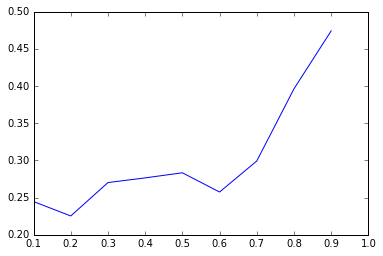

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

fig = plt.figure("N100")
surf = plt.plot(lambdas[1:10], sme_list[1:10])

plt.show()

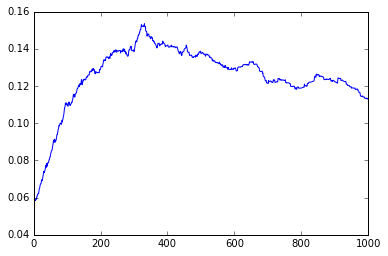

In [7]:
N0 = 100
l = 0.0
learning_rate = []
learning_rate_i = []
n_elements = len(mc_agent.Q)
agent = Sarsa_Agent(Environment(), N0, l)
for i in xrange(1000):
    learning_rate_i.append(i)
    agent.train(1)
    sme = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    
    learning_rate.append(sme)
fig = plt.figure("0.0")
surf = plt.plot(learning_rate_i, learning_rate)
plt.show()

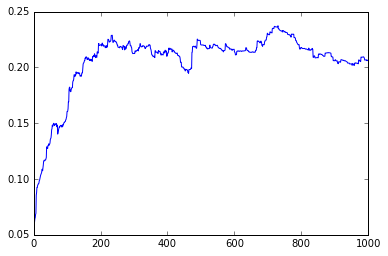

In [8]:
N0 = 100
l = 1.0
learning_rate = []
learning_rate_i = []
agent = Sarsa_Agent(Environment(), N0, l)
for i in xrange(1000):
    learning_rate_i.append(i)
    agent.train(1)
    sme = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    
    learning_rate.append(sme)
fig = plt.figure("0.0")
surf = plt.plot(learning_rate_i, learning_rate)
plt.show()

# plot from #2

In [9]:
def animate(frame):
    i = agent.iterations
    step_size = i
    step_size = max(1, step_size)
    step_size = min(step_size, 2 ** 16)
    agent.train(step_size)

    ax.clear()
    surf =  agent.plot_frame(ax)
    plt.title('MC score:%s frame:%s step_size:%s ' % (float(agent.count_wins)/agent.iterations*100, frame, step_size) )
    # plt.draw()
    fig.canvas.draw()
    print "done ", frame, step_size, i
    return surf

done  0 1 0
done  0 1 1
done  1 2 2
done  2 4 4
done  3 8 8
done  4 16 16
done  5 32 32
done  6 64 64
done  7 128 128
done  8 256 256
done  9 512 512
done  10 1024 1024
done  11 2048 2048
done  12 4096 4096
done  13 8192 8192
done  14 16384 16384
done  15 32768 32768
done  16 65536 65536
done  17 65536 131072
done  18 65536 196608
done  19 65536 262144
done  20 65536 327680
done  21 65536 393216
done  22 65536 458752
done  23 65536 524288
done  24 65536 589824
done  25 65536 655360
done  26 65536 720896
done  27 65536 786432
done  28 65536 851968
done  29 65536 917504
done  30 65536 983040
done  31 65536 1048576
done  32 65536 1114112
done  33 65536 1179648
done  34 65536 1245184
done  35 65536 1310720
done  36 65536 1376256
done  37 65536 1441792
done  38 65536 1507328
done  39 65536 1572864
done  40 65536 1638400
done  41 65536 1703936
done  42 65536 1769472
done  43 65536 1835008
done  44 65536 1900544
done  45 65536 1966080
done  46 65536 2031616
done  47 65536 2097152
done  48 655

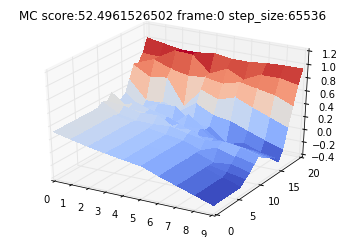

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

N0 = 100
mlambda = 0.2
agent = Sarsa_Agent(Environment(), N0, mlambda)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

# ani = animation.FuncAnimation(fig, animate, 32, repeat=False)
ani = animation.FuncAnimation(fig, animate, 500, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('Sarsa_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

In [11]:
from IPython.display import Image
Image(url="Sarsa_Agent.gif")

In [12]:
# for i in xrange (10):
#     agent.train(50000)

In [13]:
agent.validate(50000)

52.22

In [14]:
# 100, .75, 520 itterations = 52.8
# 1000, .75, 520 itterations = 

In [15]:
stick_v = np.zeros((agent.env.dealer_values_count, agent.env.player_values_count))
hit_v = np.zeros((agent.env.dealer_values_count, agent.env.player_values_count))
actions = np.zeros((agent.env.dealer_values_count, agent.env.player_values_count))
values = np.zeros((agent.env.dealer_values_count, agent.env.player_values_count))
for d in xrange(agent.env.dealer_values_count):
    for p in xrange(agent.env.player_values_count):
        action = Actions.to_action(np.argmax(agent.Q[d, p, :]))
        value = agent.V[d, p]
        values[d,p] = value 
        if (action == Actions.stick):
            stick_v[d,p] = value
            hit_v[d,p] = 0
            actions[d,p] = -1
        else:
            hit_v[d,p] = value
            stick_v[d,p] = 0
            actions[d,p] = 1

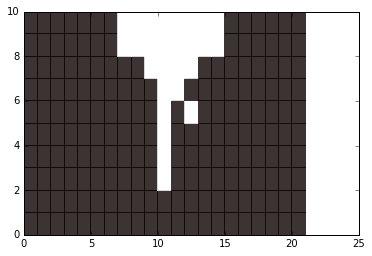

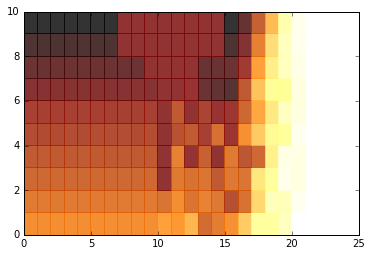

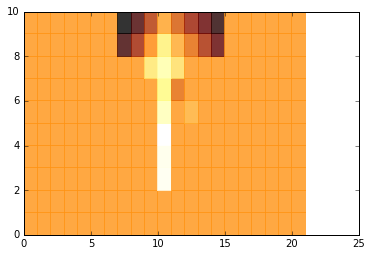

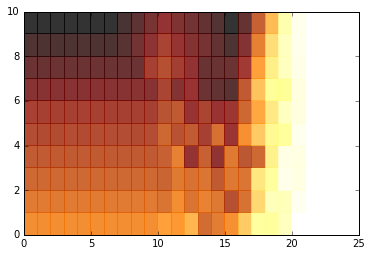

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

# fig = plt.figure("N100")
# ax = fig.add_subplot()
# bx = fig.add_subplot()
fig, ax = plt.subplots()
fig2, bx = plt.subplots()
fig3, cx = plt.subplots()
fig4, dx = plt.subplots()
heatmap3 = ax.pcolor(actions, cmap=plt.cm.hot, alpha=0.8)
heatmap = bx.pcolor(stick_v, cmap=plt.cm.afmhot, alpha=0.8)
heatmap2 = cx.pcolor(hit_v, cmap=plt.cm.afmhot, alpha=0.8)
heatmap4 = dx.pcolor(values, cmap=plt.cm.afmhot, alpha=0.8)
plt.show()